- Supervised Learning
    - Regression and Classification
    - k-Nearest Neighbors
    - Linear Regression
    - Logistic Regression
    - Support Vector Machine (SVM)
    - Decision Tree and Random Forest
    - Neural Networks
- Unsupervised Leanring
    - Clustering
        - k-Means
        - Hierarchical Cluster Analysis (HCA)
        - Expectation Maximization
    - Visualization and Dimensionality Reduction
        - Principal Component Analysis (PCA)
        - Kernel PCA
        - Locally-Linear Embedding (LLE)
        - t-distributed Stochastic Neighbor Embedding (t-SNE)
    - Association Rule Learning
        - Apriori
        - Eclat
- Semisupervised Learning
    - Deep Belief Networks (DBN)
        - Restricted Boltzmann Machine (RBM)
- Reinforcement Learning
    - agent
    - reward (or penalty)
    - policy
    - DeepMind's AlphaGo

- Batch Learning
    - Offline Learning
    - Uses all data at once
    - lr=1
- Online Learning
    - mini-batches (sometimes just called "batches")
    - out-of-core learning
    - learning rate
    - batch size

- Instance-based Learning
    - learn on the fly
    - email spam filter
    - measure of similarity
- Model-based Learning
    - model
    - predictions
    - parameters
    - utility function (or cost function)

In [26]:
def prepare_country_stats(oecd_bli, gdp_per_capita, gdp_type="NGDPDPC"):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="OBS_VALUE")
    
    gdp_per_capita = gdp_per_capita[gdp_per_capita["WEO Subject Code"]==gdp_type]
    gdp_per_capita = gdp_per_capita.pivot(index="Country", columns="WEO Subject Code", values="2023")
    gdp_per_capita.rename(columns={gdp_type: "GDP per capita"}, inplace=True)
    gdp_per_capita["GDP per capita"] = gdp_per_capita["GDP per capita"].str.replace(',', '').astype(float)

    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
    # return full_country_stats[["GDP per capita", 'Life satisfaction']]

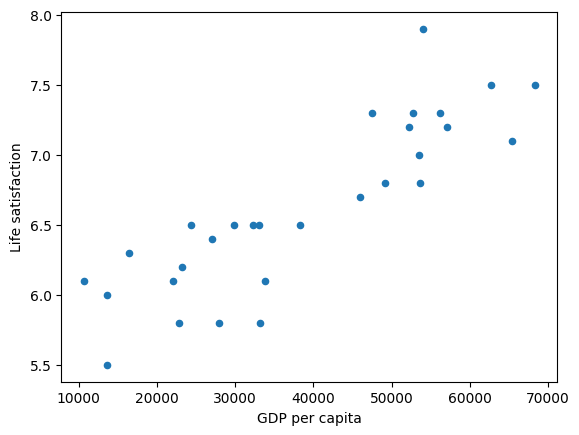

[[6.5125147]]


In [27]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv("OECD,DF_BLI,+all.csv", thousands=',')
gdp_per_capita = pd.read_csv("WEOApr2024all.csv", thousands=',', delimiter=',',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita) # type: ignore
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[34956]]
print(model.predict(X_new))

- Not enough data
- Nonrepresentative data
    - Outliers
- Bad Quality Data
    - Noisy
    - Missing Values
- Irrelevant Features
- Overfitting
    - Simplify Model
        - Fewer Parameters
    - More Training data
    - Reduce Noise in training data
    - Regularization
- Underfitting
    - Larger, more powerful model
    - Pick better features


- Cross-validation
    - Train (train the model)
    - Validate (pick hyperparameters)
- Test (Final model evaluation)